## Домашнее задание по теме «Работа с переменными»

### Задание

<b>Цель:</b><br> изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.<p>
<b>Описание задания:</b><br>
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно <br>
проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии <br>
из библиотеки <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html" target="_blank">sklearn.datasets.</a>.Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, <br>
выполнив следующий код – print(fetch_california_housing().DESCR). 

<b>Этапы работы:</b>
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.<br>
a. Сделайте выводы. <br>
b. Удалите признаки на основании полученных значений, выводов. <br>
c. Повторите п. 3, п. 4 на измененных данных.<br>
7. Исследуйте оставленные признаки на выбросы.<br>
a. Удалите выбросы в случае обнаружения.<br>
b. Повторите п. 3, п. 4 на измененных данных.<br>
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.<br>
a. Повторите п. 3, п. 4 на измененных данных.<br>
9. Сформулируйте выводы по проделанной работе.<br>
a. Кратко опишите какие преобразования были сделаны с данными.<br>
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.<br>
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.<br><p>

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.



<b>Результат:</b>
Получены знания по проведению разведочного анализа данных.
<p>

<b>Форма выполнения:</b>
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb<p>

   
<b>Инструменты:</b>
- Библиотека <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html" target="_blank">sklearn.datasets</a>
- Jupyter Notebook/Google Colab
GitHub.<p>

<b>Срок выполнения:</b> дедлайн приема решений на проверку
    
<b><i>Рекомендации к выполнению: </b></i><br>
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

___

### Решение

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



> Загружаем данные о недвижимости Калифорнии из библиотеки sklearn.datasets.

In [2]:
from sklearn.datasets import fetch_california_housing
print(fetch_california_housing().DESCR)
data = fetch_california_housing(as_frame=True).frame

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

> Проверяем данные на наличие пропусков. И в общем оцениваем и смотрим информацию по полученным данным

In [3]:
print(data.shape)
data.info()

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

> Из полученных даннных видим, что пропусков нет, следвательно ничего удалять не надо (согласно заданию)

> <b><i>Описание метрик:</b></i> <br>
RMSE (Root Mean Squared Error) и R2 (Coefficient of Determination) являются метриками, которые используются для количественной оценки того, насколько хорошо модель соответствует набору данных. RMSE сообщает нам, насколько в среднем прогнозируемые значения отличаются от наблюдаемых значений в наборе данных. Чем ниже RMSE, тем лучше модель соответствует набору данных.

> Для расчета RMSE и R2 используем библиотеку scikit-learn.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Создаем функцию метрик
# Разделяем на тренировочные и тестовые данные (согласно условию: 80% данных оставить на обучающее множество, 20% - на тестовое)

def get_metrics(X, y, random_seed=42, model=None, test_size=0.2): 
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_train = r2_score(y_train, y_pred_train)
    
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    r2_test = r2_score(y_test, y_pred_test)
    
    return (rmse_train, rmse_test, r2_train, r2_test)

In [8]:
X = data.drop(['MedHouseVal'], axis=1) 
y = data["MedHouseVal"]
get_metrics(X, y)

(0.7196757085831575, 0.7455813830127763, 0.6125511913966952, 0.575787706032451)

> Строим график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

In [9]:
def get_boxplots(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass   

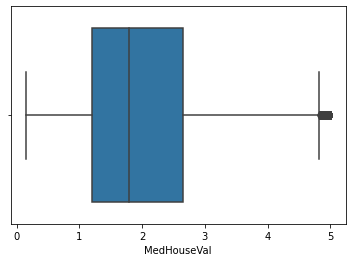

In [10]:
get_boxplots(data, ["MedHouseVal"])

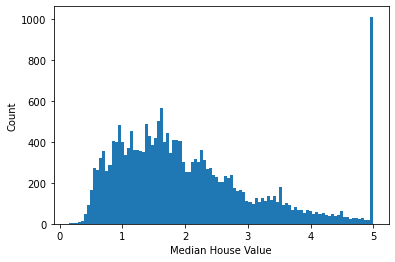

In [11]:
plt.hist(data["MedHouseVal"], bins=100)
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.show()

> на обоих графиках видно, что есть выбросы.

In [12]:
data[data["MedHouseVal"]>4.6]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [13]:
target = data["MedHouseVal"]

In [14]:
def outliers(target):
    '''
    Функция поиска выброса
    '''
    z_scores = (target - np.mean(target)) / np.std(target)
    outliers_z = target[np.abs(z_scores) > 3]

    q1 = target.quantile(0.25)
    q3 = target.quantile(0.75)
    iqr = q3 - q1
    outliers_iqr = target[(target < q1 - 1.5 * iqr) | (target > q3 + 1.5 * iqr)]
    return outliers_iqr.min()

In [15]:
outliers(data["MedHouseVal"])

4.827

In [16]:
data[data["MedHouseVal"] > outliers(data["MedHouseVal"])]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


> Из проведенных изысканий видно, что из 20640 строк 1070 строк - это выбросы

> Посчитаем и выведим корреляционную матрицу (необходимо убедиться, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции).

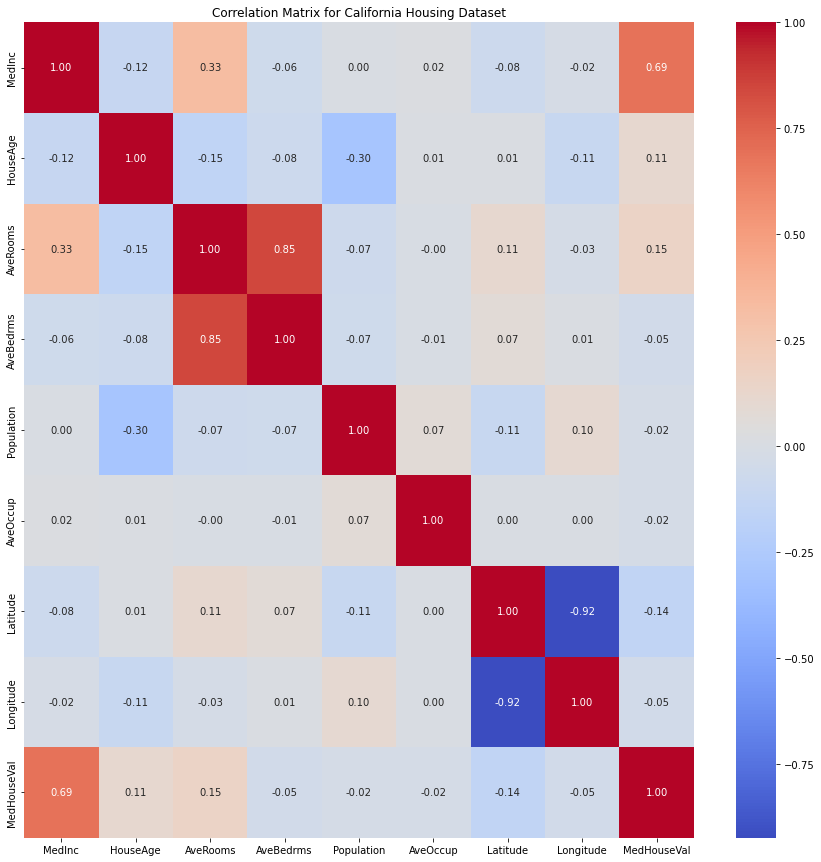

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix for California Housing Dataset')
plt.show()

> Сильная корреляция, судя по полученной матрице, **0.85** между **AveRooms** и **AveBedrms**. Один их признаков можем удалить и посмотреть на метрики, как это повлияет.

In [18]:
X1 = data.drop(['MedHouseVal', 'AveRooms'], axis=1) 
y1 = data["MedHouseVal"]
get_metrics(X1, y1)

(0.7272420835082767,
 0.7419270782296468,
 0.6043614091244853,
 0.5799358837198176)

In [19]:
# RMSE train: 0.7196757085831575;
# RMSE test: 0.7455813830127763;
# R2 train: 0.6125511913966952;
# R2 test:0.575787706032451

> Из полученных метрик, при сравнении их с метриками, полученными ранее, видно, что метрики качества RMSE и R2, сильно не изменились, таким образом можно удалять без проблем сильно коррелированные данные, один из признаков, конечно же, а не все.

> Исследуем оставленные признаки на выбросы. (Удаляем выбросы в случае обнаружения. Повторите п. 3, п. 4 на измененных данных.)

In [20]:
for i in X1:
    print(f'{i}: {outliers(X1[i])}')

MedInc: 8.0137
HouseAge: nan
AveBedrms: 0.3333333333333333
Population: 3134.0
AveOccup: 0.6923076923076923
Latitude: nan
Longitude: nan


In [21]:
outliers(y1)

4.827

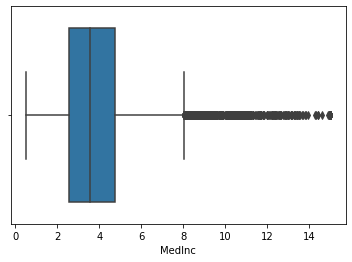

In [22]:
get_boxplots(data.drop(['AveRooms'], axis=1) , ["MedInc"])

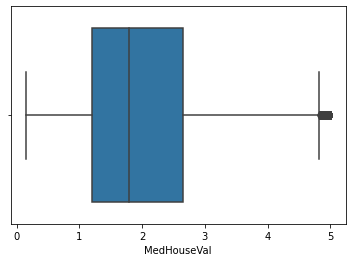

In [23]:
get_boxplots(data.drop(['AveRooms'], axis=1) , ["MedHouseVal"])

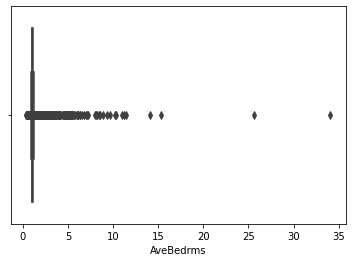

In [24]:
get_boxplots(data.drop(['AveRooms'], axis=1) , ["AveBedrms"])

In [25]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


> По полученным данным, удалю все выбросы полученные из файла.
Изходя из моей логики: <br>
Population не более 5000
Medink более 8.0137
Целевая переменная - MedHouseVal менее 4.827

In [26]:
temp = data[(data['Population'] < 5000)&(data['MedInc'] < 8.0137)&(data['MedHouseVal'] < 4.827)].copy()

In [27]:
X2 = temp.drop(['MedHouseVal', 'AveRooms'], axis=1) 
y2 = temp["MedHouseVal"]
get_metrics(X2, y2)

(0.6294227865486249, 0.6199151616977465, 0.547080259665524, 0.5620963707490221)

In [28]:
temp1 = data[(data['MedHouseVal'] < 4.827)].copy()

In [29]:
X3 = temp1.drop(['MedHouseVal'], axis=1) 
y3 = temp1["MedHouseVal"]
get_metrics(X3, y3)

(0.6273342212975435,
 0.6072589861493274,
 0.5662399734391856,
 0.6012592989543195)

> *Вывод:* На основании полученных метрик видим, что качество модели сильно ухудшается, поэтому с большой долей вероятности можно сделать предположение, что удаляемые значения могут не быть выбросами.

> Изменяем несколько признаков на выбор математически. Например, вычислим логарифм, возведите в квадрат, извлеките квадратный корень.

In [30]:
temp2 = data.copy()

In [31]:
temp2['HouseAge'] = np.log(temp2['HouseAge'])
temp2['Population'] = np.log(temp2['Population'])
temp2['AveOccup'] = np.sqrt(temp2['AveOccup'])
temp2['MedInc'] = np.power(temp2['MedInc'], 2)

temp2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,18.591242,3.225135,5.429000,1.096675,7.024116,1.703329,35.631861,-119.569704,2.068558
std,21.946544,0.567748,2.474173,0.473911,0.738524,0.411502,2.135952,2.003532,1.153956
min,0.249900,0.000000,0.846154,0.333333,1.098612,0.832050,32.540000,-124.350000,0.149990
25%,6.571020,2.890372,4.440716,1.006079,6.668228,1.558763,33.930000,-121.800000,1.196000
50%,12.494811,3.367296,5.229129,1.048780,7.061334,1.678724,34.260000,-118.490000,1.797000
75%,22.498421,3.610918,6.052381,1.099526,7.452982,1.811701,37.710000,-118.010000,2.647250
max,225.003000,3.951244,141.909091,34.066667,10.482402,35.260932,41.950000,-114.310000,5.000010


In [32]:
X4 = temp2.drop(['MedHouseVal'], axis=1) 
y4 = temp2["MedHouseVal"]
get_metrics(X4, y4)

(0.766599329030844, 0.7580966417608691, 0.5603799298285448, 0.5614266020821972)

In [33]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Модель", "RMSE_train", "RMSE_test",  "R2_train", "R2_test", "Признаки / действия"]
table.add_row(["Model0", *get_metrics(X, y), "AS IS"])
table.add_row(["Model1", *get_metrics(X1, y1), "Удалили Признак 'AveRooms' (сильно коррелирующий с 'AveBedrms'"])
table.add_row(["Model2", *get_metrics(X2, y2), "Убрали пред-ые выбросы,'Population'< 5000,'MedInc'< 8.0137, ЦП: 'MedHouseVal'< 4.827)"])
table.add_row(["Model3", *get_metrics(X3, y3), "Вернули все как было и убрали выбросы ЦП: 'MedHouseVal'< 4.827)"])
table.add_row(["Model4", *get_metrics(X4, y4), "Изменили признаки математически"])
print(table.get_string())


+--------+--------------------+--------------------+--------------------+--------------------+---------------------------------------------------------------------------------------+
| Модель |     RMSE_train     |     RMSE_test      |      R2_train      |      R2_test       |                                  Признаки / действия                                  |
+--------+--------------------+--------------------+--------------------+--------------------+---------------------------------------------------------------------------------------+
| Model0 | 0.7196757085831575 | 0.7455813830127763 | 0.6125511913966952 | 0.575787706032451  |                                         AS IS                                         |
| Model1 | 0.7272420835082767 | 0.7419270782296468 | 0.6043614091244853 | 0.5799358837198176 |             Удалили Признак 'AveRooms' (сильно коррелирующий с 'AveBedrms'            |
| Model2 | 0.6294227865486249 | 0.6199151616977465 | 0.547080259665524  | 0.562096370

> **Общий вывод**: <br> 
заключается в том, что преобразование данных может иметь как положительное, так и отрицательное влияние на качество модели.
Для достижения наилучшего результата, если он возможен с теми данными, что у вас есть, то конечно же нужно использовать разные методы и подходы.
